### veriye bakış

In [83]:
import pandas as pd

df = pd.read_csv('customers.csv')

In [84]:
df.head()

,user_id,price,cost,nights,meal_type,room_type
0,1,240.25,214.50,3,BE,DB
1,1,190.41,163.12,1,BE,SB
2,1,185.38,163.07,1,BE,SB
3,1,472.45,419.34,2,BC,DB
4,1,274.65,243.77,3,RO,SB


### veri temizliği

In [85]:
to_drop = df[df['user_id']==41].index
df = df.drop(to_drop)

In [86]:
to_drop = df[df.user_id==75].index
df = df.drop(to_drop)

### yemek ve oda skorlarının belirlenmesi

In [87]:
meal_list = ['RO', 'BB', 'BC', 'BE', 'HB', 'FB', 'AI', 'UI', 'UL']
room_list = ['SB','DB','TW','TB','QB','FL5','FL6','FL7','FL8']

meal_score={}
room_score={}

for i in range(len(meal_list)):
    meal_score[meal_list[i]] = i+4
    
for i in range(len(room_list)):
    room_score[room_list[i]] = i+4

### yeni değişkenlerin türetilmesi

In [88]:
duration = {}
duration_once = {}
frequency = {}
total_user_consumption = {}
average_user_consumption = {}
total_user_profit = {}
average_user_profit = {}
frequent_meal = {}
frequent_room = {}
meal_average_score = {}
room_average_score = {}
frequent_meal_score={}
frequent_room_score={}

unique_users = df.user_id.unique()

for user_id in unique_users:
    user_info = df[df.user_id==user_id]
    duration[user_id] = user_info['nights'].sum()
    duration_once[user_id] = user_info['nights'].mean()
    frequency[user_id] = len(user_info)
    total_user_consumption[user_id] = (user_info['price']*user_info['nights']).sum()
    total_user_profit[user_id] = ((user_info['price'] - user_info['cost'])*user_info['nights']).sum()
    average_user_consumption[user_id] = (user_info['price']*user_info['nights']).mean()
    average_user_profit[user_id] = ((user_info['price'] - user_info['cost'])*user_info['nights']).mean()
    frequent_meal[user_id] = user_info.meal_type.value_counts().keys()[0]
    frequent_room[user_id] = user_info.room_type.value_counts().keys()[0]
    frequent_meal_score[user_id] = meal_score[frequent_meal[user_id]]
    frequent_room_score[user_id] = room_score[frequent_room[user_id]]
    
    meal_types = user_info['meal_type'].values
    room_types = user_info['room_type'].values
    total_meal=0
    total_room=0
    
    for i in range(len(meal_types)):
        total_meal+=meal_score[meal_types[i]]
        
    for i in range(len(room_types)):
        total_room+=room_score[room_types[i]]
    
    meal_average_score[user_id] = total_meal/len(meal_types)
    room_average_score[user_id] = total_room/len(room_types)

### yeni bir dataframe oluşturulması

In [89]:
# new dataframe
import numpy as np
data = pd.DataFrame()

In [90]:
data['user_id'] = np.arange(1,99)
data['duration'] = duration.values()
data['duration_once'] = duration_once.values()
data['frequency'] = frequency.values()
data['total_user_consumption'] = total_user_consumption.values()
data['average_user_consumption'] = average_user_consumption.values()
data['total_user_profit'] = total_user_profit.values()
data['average_user_profit'] = average_user_profit.values()
data['meal_average_score'] = meal_average_score.values()
data['room_average_score'] = room_average_score.values()
# data['frequent_meal'] = frequent_meal.values()
# data['frequent_room'] = frequent_room.values()
data['frequent_meal_score'] = frequent_meal_score.values()
data['frequent_room_score'] = frequent_room_score.values()

### kümeleme 

In [91]:
from sklearn.cluster import KMeans

In [92]:
X = data.drop(['user_id'], axis=1)

In [93]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(X)
segment = k_mean.predict(X)
data['segment'] = segment

In [94]:
y_axis = ['frequency', 'duration','duration_once'] 
x_axis = ['total_user_consumption','average_user_consumption','total_user_profit','average_user_profit']

In [95]:
import matplotlib.pyplot as plt

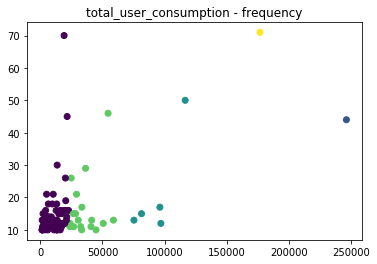

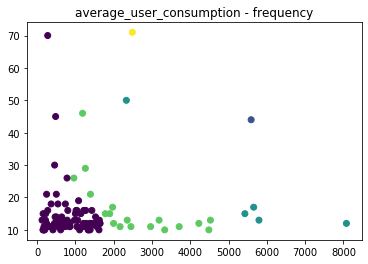

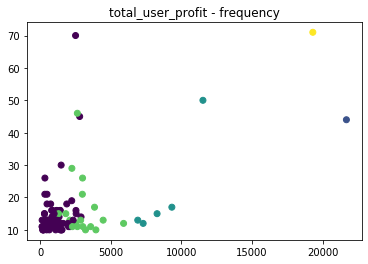

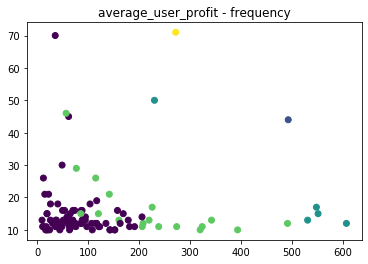

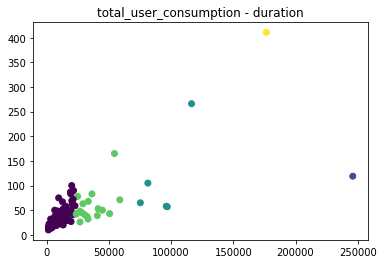

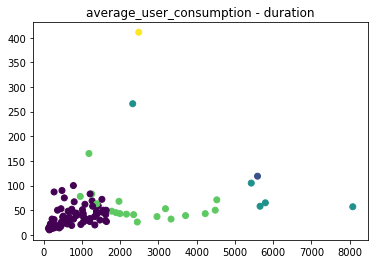

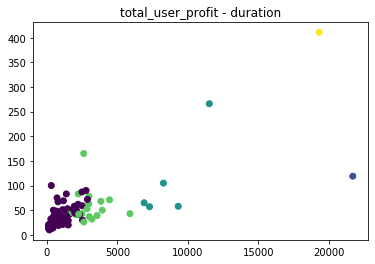

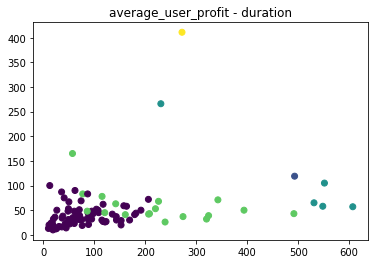

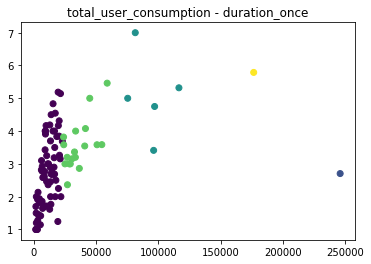

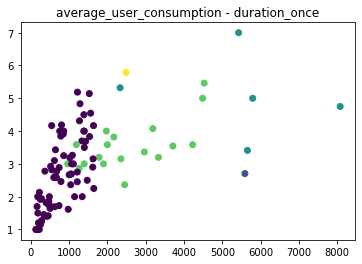

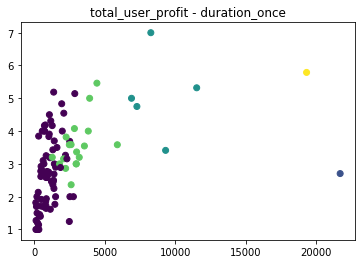

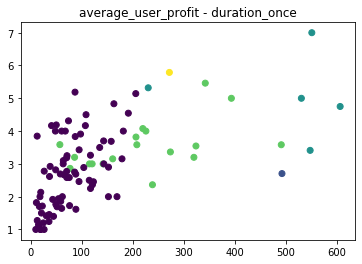

In [96]:
for y_item in y_axis:
    for x_item in x_axis:
        
        plt.title(x_item+' - '+ y_item)
        plt.scatter(x=x_item, y=y_item, data=data, c=data.segment)
        plt.show()

In [97]:
data.head()

,user_id,duration,duration_once,frequency,total_user_consumption,average_user_consumption,total_user_profit,average_user_profit,meal_average_score,room_average_score,frequent_meal_score,frequent_room_score,segment
0,1,23,1.642857,14,6999.87,499.990714,847.55,60.539286,5.071429,4.285714,4,4,0
1,2,30,2.000000,15,17108.33,1140.555333,2537.13,169.142000,5.533333,5.200000,6,5,0
2,3,32,2.461538,13,10204.42,784.955385,1229.98,94.613846,6.000000,7.000000,6,8,0
3,4,43,2.687500,16,16607.63,1037.976875,1412.31,88.269375,5.312500,5.625000,6,5,0
4,5,59,3.687500,16,22848.19,1428.011875,2524.47,157.779375,5.375000,5.062500,4,5,0


In [98]:
seg = {}
for i in range(len(data)):
    seg[int(data.user_id[i])] = int(data.segment[i])

In [99]:
import json

In [100]:
a_file = open('data.json', 'w')
json.dump(seg, a_file)
a_file.close()